# Reachability

In [1]:
] activate ../

In [1]:
1+1

2

In [2]:
using Revise
using Interact
using POMDPModelChecking
using DiscreteValueIteration
using POMDPSimulators
using BeliefUpdaters
includet("../test/blind_gridworld.jl")

HTML{String}("    <script id=\"webio-setup-1355200988839131184\">\n    // Immediately-invoked-function-expression to avoid global variables.\n    (function() {\n        var warning_div = document.getElementById(\"webio-warning-17256603899179281206\");\n        var hide = function () {\n            var script = document.getElementById(\"webio-setup-1355200988839131184\");\n            var parent = script && script.parentElement;\n            var grandparent = parent && parent.parentElement;\n            if (grandparent) {\n                grandparent.style.display = \"none\";\n            }\n            warning_div.style.display = \"none\";\n        };\n        if (window.require && require.defined) {\n            // Jupyter notebook.\n            if (require.defined(\"nbextensions/webio/main\")\n                    || require.defined(\"/assetserver/8715ecfbd47aa7de81077aaf96f3df24defcde18-dist/main.js\")) {\n                // Extension already loaded.\n                hide();\n                return;\n            }\n            console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n            require([\"/assetserver/8715ecfbd47aa7de81077aaf96f3df24defcde18-dist/main.js\"], function (webIOModule) {\n                webIOModule.load_ipython_extension();\n            });\n            warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n        } else if (window.location.pathname.includes(\"/lab\")) {\n            // Guessing JupyterLab\n            warning_div.innerHTML = \"WebIO does not support JupyterLab yet.\";\n        }\n    })();\n    </script>\n    <div\n        id=\"webio-warning-17256603899179281206\"\n        class=\"output_text output_stderr\"\n        style=\"padding: 1em; font-weight: bold;\"\n    >\n        Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n        <!-- TODO: link to installation docs. -->\n    </div>\n")

┌ Info: Precompiling POMDPModelChecking [abefb91b-a28c-5ab9-9bd9-026e532d7b0e]
└ @ Base loading.jl:1192
┌ Warning: Package POMDPModelChecking does not have Distributions in its dependencies:
│ - If you have POMDPModelChecking checked out for development and have
│   added Distributions as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with POMDPModelChecking
│ Loading Distributions into POMDPModelChecking from project dependency, future warnings for POMDPModelChecking are suppressed.
└ @ nothing nothing:840


## MDP Example with Value Iteration

In [3]:
mdp = SimpleGridWorld(size=(10,10), terminate_from=Set([GWPos(9,3), GWPos(4,3)]), tprob=0.7);

In [9]:
reach = Set([GWPos(10,1)])
avoid = mdp.terminate_from
solver = ReachabilitySolver(reach, avoid, ValueIterationSolver(verbose=true))

ReachabilitySolver{SArray{Tuple{2},Int64,1,2}}
  reach: Set{SArray{Tuple{2},Int64,1,2}}
  avoid: Set{SArray{Tuple{2},Int64,1,2}}
  solver: ValueIterationSolver


In [10]:
policy = solve(solver, mdp);

[Iteration 1   ] residual:      0.749 | iteration runtime:      3.044 ms, (   0.00304 s total)
[Iteration 2   ] residual:       0.49 | iteration runtime:      2.530 ms, (   0.00557 s total)
[Iteration 3   ] residual:      0.343 | iteration runtime:      2.850 ms, (   0.00842 s total)
[Iteration 4   ] residual:      0.257 | iteration runtime:      2.630 ms, (    0.0111 s total)
[Iteration 5   ] residual:      0.245 | iteration runtime:      4.323 ms, (    0.0154 s total)
[Iteration 6   ] residual:      0.218 | iteration runtime:      2.697 ms, (    0.0181 s total)
[Iteration 7   ] residual:      0.189 | iteration runtime:      1.577 ms, (    0.0197 s total)
[Iteration 8   ] residual:      0.185 | iteration runtime:      1.285 ms, (    0.0209 s total)
[Iteration 9   ] residual:      0.173 | iteration runtime:      1.846 ms, (    0.0228 s total)
[Iteration 10  ] residual:      0.158 | iteration runtime:      1.991 ms, (    0.0248 s total)
[Iteration 11  ] residual:      0.152 | iteration 

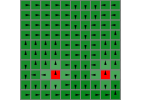

In [11]:
POMDPModels.render(mdp, Dict(), valuecolor=s->value(policy, s), action=s->action(policy, s))

## POMDP Example

In [4]:
using QMDP
using FIB
using SARSOP
using POMDPPolicies
using BeliefUpdaters

In [13]:
pomdp = BlindGridWorld(size=(10,10), exit=GWPos(10,1), 
                       simple_gw=SimpleGridWorld(size=(10,10), 
                                                 rewards=Dict(GWPos(10,1)=>1.0), 
                                                 terminate_from=Set([GWPos(10,1), avoid...]), tprob=0.7));

In [14]:
γ = 1 - 1e-4
POMDPs.discount(pomdp::ReachabilityPOMDP) = γ

# solver = ReachabilitySolver(reach, avoid, SARSOPSolver(precision=1e-5, timeout=10.0))
solver = ReachabilitySolver(reach, avoid, FIBSolver(verbose=true))
policy = solve(solver, pomdp);

[Iteration 1   ] residual:          1 
[Iteration 2   ] residual:        0.7 
[Iteration 3   ] residual:       0.52 
[Iteration 4   ] residual:       0.42 
[Iteration 5   ] residual:      0.344 
[Iteration 6   ] residual:      0.277 
[Iteration 7   ] residual:      0.233 


InterruptException: InterruptException:

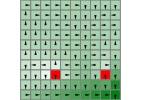

In [19]:
POMDPModels.render(pomdp.simple_gw, Dict(), 
                   valuecolor=s->value(policy, deterministic_belief(pomdp, s)), 
                   action = s->action(policy, deterministic_belief(pomdp, s)))

In [16]:
up = DiscreteUpdater(pomdp)
# b0 = deterministic_belief(pomdp, GWPos(1,10))
b0 = uniform_belief(pomdp)
hr = HistoryRecorder(max_steps=500)
s0 = GWPos(1,10)
hist = simulate(hr, pomdp, policy, up, b0, s0)
hsab = collect(eachstep(hist, "s, a, b, sp"))
@manipulate for step=1:n_steps(hist)
    s, a, b, sp = hsab[step]
    POMDPModels.render(pomdp.simple_gw, Dict(:s=>s, :a=>a), valuecolor=s->pdf(b, s), minr=-1, maxr=1.0)
#     @printf("action: %s, observation: %s\n", a, o)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:step=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
14), Observable{Int64} with 2 listeners. Value:
14, Scope("knockout-component-c48de646-a7e3-41e4-9a0d-3f396d11748c", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["step"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>28,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
14, nothing)), Set(String[]), nothing, Any["knockout"=>"/mnt/c/Users/Maxime/wsl/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/mnt/c/Users/Maxime/wsl/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/mnt/c/Users/Maxime/wsl/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/mnt/c/Users/Maxime/wsl/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/mnt/c/Users/Maxime/wsl/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":14}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (_webIOScope.setObservableValue({\"name\":\"changes\",\"scope\":\"knockout-component-c48de646-a7e3-41e4-9a0d-3f396d11748c\",\"id\":\"ob_44\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (_webIOScope.setObservableValue({\"name\":\"value\",\"scope\":\"knockout-component-c48de646-a7e3-41e4-9a0d-3f396d11748c\",\"id\":\"ob_43\",\"type\"

In [32]:
γ = 1 - 1e-4
POMDPs.discount(pomdp::ReachabilityPOMDP) = γ

solver = ReachabilitySolver(reach, avoid, DeepQLearningSolver(qnetwork=Chain(Dense(2,16, relu), Dense(16,4)),
                                                        prioritized_replay=true,
                                                        train_start = 10_000,
                                                        max_steps = 100_000, eval_freq=10000, log_freq=5000, recurrence=false, trace_length=100))
policy = solve(solver, pomdp);

 5000 / 100000 eps 0.901 |  avgR 0.033 | Loss 2.334e-03 | Grad 3.023e-02 
Evaluation ... Avg Reward 0.01
10000 / 100000 eps 0.802 |  avgR 0.059 | Loss 6.244e-04 | Grad 5.489e-03 
Saving new model with eval reward 0.010 
15000 / 100000 eps 0.703 |  avgR 0.029 | Loss 1.872e-04 | Grad 1.538e-03 
Saving new model with eval reward 0.010 
Saving new model with eval reward 0.010 
Evaluation ... Avg Reward 0.0
20000 / 100000 eps 0.604 |  avgR 0.000 | Loss 4.443e-04 | Grad 8.757e-03 
25000 / 100000 eps 0.505 |  avgR 0.010 | Loss 1.883e-04 | Grad 1.765e-03 
Evaluation ... Avg Reward 0.0
30000 / 100000 eps 0.406 |  avgR 0.020 | Loss 2.697e-04 | Grad 4.636e-03 
35000 / 100000 eps 0.307 |  avgR 0.069 | Loss 8.858e-04 | Grad 2.101e-02 
Evaluation ... Avg Reward 0.09
40000 / 100000 eps 0.208 |  avgR 0.039 | Loss 7.710e-04 | Grad 3.315e-02 
Saving new model with eval reward 0.090 
45000 / 100000 eps 0.109 |  avgR 0.049 | Loss 3.670e-04 | Grad 7.150e-03 
Saving new model with eval reward 0.090 
Saving 

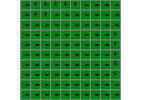

In [33]:
POMDPModels.render(pomdp.simple_gw, Dict(), 
                   valuecolor=s->Flux.data(value(policy, s)), 
                   action = s->action(policy, s))

In [28]:
value(policy, GWPos(1,1)).data

4.412729575302218

In [22]:
using RLInterface
p = ReachabilityPOMDP(pomdp, reach, avoid)
env = POMDPEnvironment(p)
obs_dimensions(env)

(1,)

## Case Study: Tiger POMDP: action dependent labels

3 states problem: tiger_left, tiger_right, end_state. If we open a door we end up in the end_state. 

Formula: "F !eaten"

This is a reachability formula, no need to build a product MDP.

In [ ]:
T = zeros(3,3,3) # |S|x|A|x|S|, T[s', a, s] = p(s'|a,s)
T[:,:,1] = [1. 0. 0.; 
            0. 0. 0.;
            0. 1. 1.]
T[:,:,2] = [0. 0. 0.; 
            1. 0. 0.;
            0. 1. 1.]
T[:,:,3] = [0. 0. 0.; 
            0. 0. 0.;
            1. 1. 1.]
R = [0. 0. 1.;
     0. 1. 0.;
     0. 0. 0.]
O = zeros(3,3,3)
O[:,:,1] = [0.85 0.5 0.5; 
            0.15 0.5 0.5;
            0.0  0.0 0.0]
O[:,:,2] = [0.15 0.5 0.5; 
            0.85 0.5 0.5;
            0.0  0.0 0.0]
O[:,:,3] = [0. 0. 0.; 
            0. 0. 0.;
            1. 1. 1.]
POMDPs.initialstate_distribution(::TabularPOMDP) = DiscreteBelief(pomdp, [0.5,0.5,0.])

In [ ]:
γ =  1 - 1e-5
pomdp = TabularPOMDP(T, R, O, γ)
# pomdp = TigerPOMDP(0., 0., 1., 0.85, γ)
sarsop = SARSOPSolver(timeout=10., precision=1e-6)
sarsop_policy = solve(sarsop, pomdp);

In [ ]:
using POMDPModels
using POMDPTesting 
using POMDPSimulators
using GridInterpolations
using Distributions
using LocalApproximationValueIteration
using LocalFunctionApproximation
using SARSOP
using NearestNeighbors
using StaticArrays

includet("/mnt/c/Users/Maxime/OneDrive - Leland Stanford Junior University/Research/BeliefStateMDP/BeliefStateMDP.jl")

In [ ]:
bmdp = BeliefStateMDP(pomdp, DiscreteUpdater(pomdp))
# beliefs =  [DiscreteBelief(pomdp, [p, 1.0 - p, 0.]) for p in LinRange(0,1, 10)]
# beliefs = sample_belief_space(pomdp, 50)
# vec_b = [convert_s(Vector{Float64}, beliefs[i], bmdp) for i=1:length(beliefs)]
# nntree = KDTree(vec_b)
# k = 2                                                                     # the k parameter for knn approximator
# knnfa = LocalNNFunctionApproximator(nntree, vec_b, k)
npts = 10
grid = RectangleGrid(LinRange(0.,1., npts),LinRange(0.,1., npts), LinRange(0., 1., npts))      # rectangular grid
gifa = LocalGIFunctionApproximator(grid)  # c
solver = LocalApproximationValueIterationSolver(gifa, verbose=true, max_iterations=30)
belief_policy = solve(solver, bmdp)

In [84]:
qmdp_policy = solve(QMDPSolver(verbose=true), pomdp)

[Iteration 1   ] residual:          1 | iteration runtime:      0.004 ms, (  4E-06 s total)
[Iteration 2   ] residual:          0 | iteration runtime:      0.004 ms, (  8E-06 s total)


AlphaVectorPolicy{TabularPOMDP,Int64}(TabularPOMDP([1.0 0.0 0.0; 0.0 0.0 0.0; 0.0 1.0 1.0]

[0.0 0.0 0.0; 1.0 0.0 0.0; 0.0 1.0 1.0]

[0.0 0.0 0.0; 0.0 0.0 0.0; 1.0 1.0 1.0], [0.0 0.0 1.0; 0.0 1.0 0.0; 0.0 0.0 0.0], [0.85 0.5 0.5; 0.15 0.5 0.5; 0.0 0.0 0.0]

[0.15 0.5 0.5; 0.85 0.5 0.5; 0.0 0.0 0.0]

[0.0 0.0 0.0; 0.0 0.0 0.0; 1.0 1.0 1.0], 0.9999), Array{Float64,1}[[0.9999, 0.9999, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]], [1, 2, 3])

In [85]:
fib_policy = solve(FIBSolver(verbose=true), pomdp)

[Iteration 1   ] residual:          1 
[Iteration 2   ] residual:          1 
[Iteration 3   ] residual:          0 


AlphaVectorPolicy{TabularPOMDP,Int64}(TabularPOMDP([1.0 0.0 0.0; 0.0 0.0 0.0; 0.0 1.0 1.0]

[0.0 0.0 0.0; 1.0 0.0 0.0; 0.0 1.0 1.0]

[0.0 0.0 0.0; 0.0 0.0 0.0; 1.0 1.0 1.0], [0.0 0.0 1.0; 0.0 1.0 0.0; 0.0 0.0 0.0], [0.85 0.5 0.5; 0.15 0.5 0.5; 0.0 0.0 0.0]

[0.15 0.5 0.5; 0.85 0.5 0.5; 0.0 0.0 0.0]

[0.0 0.0 0.0; 0.0 0.0 0.0; 1.0 1.0 1.0], 0.9999), Array{Float64,1}[[0.9999, 0.9999, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]], [1, 2, 3])

In [9]:
# plot the alpha vectors
using Plots
pgfplots()
using Plots.PlotMeasures

In [29]:
b_list = [DiscreteBelief(pomdp, [p, 1.0 - p, 0.]) for p in LinRange(0,1, 2000)]
v_list = [value(sarsop_policy, b) for b in b_list]
av_list = [actionvalues(sarsop_policy, b) for b in b_list];
av_list = hcat(av_list...)
av_list = [av_list[i, :] for i=1:n_actions(pomdp)];

In [11]:
qmdp_v = [value(qmdp_policy, b) for b in b_list]
fib_v = [value(fib_policy, b) for b in b_list];

UndefVarError: UndefVarError: qmdp_policy not defined

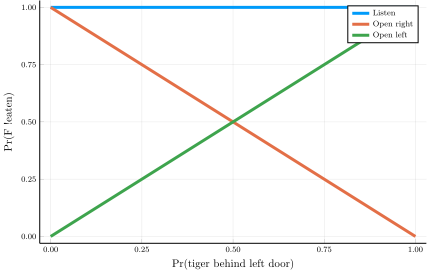

In [32]:
# plot(LinRange(0,1,100), v_list, ylims=(0.999, 1.00001), xlims=(0.,1.0))
# plot(LinRange(0,1,100), av_list, ylims=(0.999, 1.00001), xlims=(0.,1.0))
plot(LinRange(0,1,2000), [av_list...], label=["Listen", "Open right", "Open left"], lw=3,
#     lw=3, ylims=(0.999, 1.00001), xlims=(0.,0.005),
     xlabel="Pr(tiger behind left door)",
     ylabel="Pr(F !eaten)")

In [ ]:
bspace = [DiscreteBelief(pomdp, [p, 1.0 - p, 0.]) for p in LinRange(0,1, 2000)]
sarsop_values = [value(sarsop_policy, b) for b in bspace]
belief_values = [value(belief_policy, b) for b in bspace]
p = plot(LinRange(0,1,length(bspace)), [sarsop_values, belief_values], label=["SARSOP", "Belief MDP"], 
      lw=3,
#       ylims=(0.999, 1.00001), xlims=(0.,0.005),
     xlabel="Pr(tiger behind left door)",
     ylabel="Pr(F !eaten)")

In [33]:
savefig("tiger_opt_value.pdf")

In [30]:
using PGFPlots

In [67]:
p = plot([sin, cos], zeros(0), leg=false)
anim = Animation()
for x = range(0, stop=10π, length=100)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end
anim

Animation("/tmp/tmpTOY7gs", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

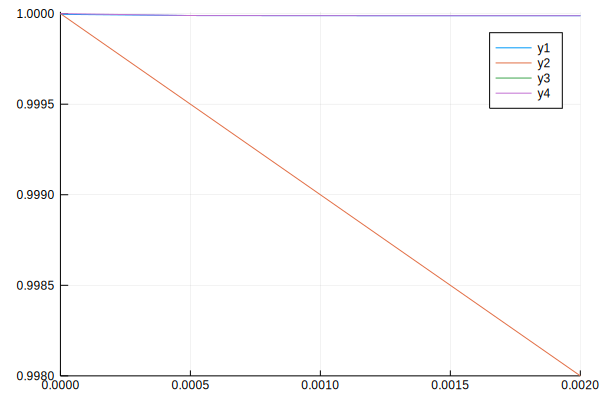

In [118]:
plot(LinRange(0,1,2000), [av_list..., v_list],  ylims=(0.998, 1.00001), xlims=(0.,0.002))

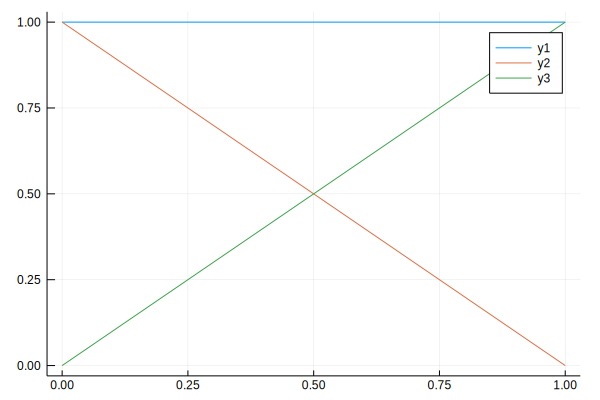

In [125]:
plot(LinRange(0,1,2000), av_list)

In [117]:
b = b_list[2]

DiscreteBelief{TabularPOMDP,Int64}(TabularPOMDP([1.0 0.0 0.0; 0.0 0.0 0.0; 0.0 1.0 1.0]

[0.0 0.0 0.0; 1.0 0.0 0.0; 0.0 1.0 1.0]

[0.0 0.0 0.0; 0.0 0.0 0.0; 1.0 1.0 1.0], [0.0 0.0 1.0; 0.0 1.0 0.0; 0.0 0.0 0.0], [0.85 0.5 0.5; 0.15 0.5 0.5; 0.0 0.0 0.0]

[0.15 0.5 0.5; 0.85 0.5 0.5; 0.0 0.0 0.0]

[0.0 0.0 0.0; 0.0 0.0 0.0; 1.0 1.0 1.0], 0.999999), [1, 2, 3], [0.00050025, 0.9995, 0.0])

## Using online solvers

In [13]:
using ARDESPOT

┌ Info: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/compiled/v1.0/ARDESPOT/pQ3IU.ji for ARDESPOT [d96c9ae4-3372-47d5-8a88-316ae77be8cf]
└ @ Base loading.jl:1184


In [18]:
using POMDPs, POMDPModels, POMDPModelTools, POMDPSimulators, ARDESPOT

pomdp = BlindGridWorld()
solver = DESPOTSolver(bounds=(-10.0, 10.0))
planner = solve(solver, pomdp)

for (s, a, o) in stepthrough(pomdp, planner, "sao", max_steps=10)
    println("State was $s,")
    println("action $a was taken,")
    println("and observation $o was received.\n")
end

MethodError: MethodError: Cannot `convert` an object of type UndefInitializer to an object of type SArray{Tuple{2},Int64,1,2}
Closest candidates are:
  convert(::Type, ::X, !Matched::Union{MDP, POMDP}) where X at /mnt/c/Users/Maxime/wsl/.julia/packages/POMDPs/JiYXY/src/pomdp.jl:205
  convert(::Type{SA<:StaticArray}, !Matched::SA<:StaticArray) where SA<:StaticArray at /mnt/c/Users/Maxime/wsl/.julia/packages/StaticArrays/WmJnA/src/convert.jl:9
  convert(::Type{SA<:StaticArray}, !Matched::StaticArray) where SA<:StaticArray at /mnt/c/Users/Maxime/wsl/.julia/packages/StaticArrays/WmJnA/src/convert.jl:8
  ...

In [17]:
typeof(pomdp)

FullyObservablePOMDP{SArray{Tuple{2},Int64,1,2},Symbol}

For POMDPs.jl problems with terminal states, the predict functions throws an error: 



MWE:
```julia
using POMDPs, POMDPModels, POMDPSimulators, ARDESPOT
pomdp = FullyObservablePOMDP(SimpleGridWorld())
solver = DESPOTSolver(bounds=(-10.0, 10.0))
planner = solve(solver, pomdp)

for (s, a, o) in stepthrough(pomdp, planner, "sao", max_steps=10)
    println("State was $s,")
    println("action $a was taken,")
    println("and observation $o was received.\n")
end
```

In [28]:
using POMDPs, POMDPModels, POMDPSimulators, ARDESPOT

pomdp = TigerPOMDP()

solver = DESPOTSolver(bounds=(-20.0, 0.0))
planner = solve(solver, pomdp)

for (s, a, o) in stepthrough(pomdp, planner, "sao", max_steps=10)
    println("State was $s,")
    println("action $a was taken,")
    println("and observation $o was received.\n")
end

State was false,
action 0 was taken,
and observation true was received.

State was false,
action 0 was taken,
and observation false was received.

State was false,
action 0 was taken,
and observation true was received.

State was false,
action 0 was taken,
and observation false was received.

State was false,
action 0 was taken,
and observation true was received.

State was false,
action 0 was taken,
and observation false was received.

State was false,
action 0 was taken,
and observation true was received.

State was false,
action 0 was taken,
and observation false was received.

State was false,
action 0 was taken,
and observation false was received.

State was false,
action 0 was taken,
and observation false was received.

